

# Project: Investigate a Dataset - NoShow Appointments Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 



### Question(s) for Analysis


In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
df=pd.read_csv('./Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


In [3]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
df.Neighbourhood.value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

In [6]:
df.PatientId.loc[1]

558997776694438.0

In [7]:
#We can conclude from this that there are no missing values, it is still possible to get duplicate values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [8]:
df.PatientId.nunique()

62299

In [9]:
df.ScheduledDay.nunique()

103549

In [10]:
#I would be trying to think of the relations age, smsreceived, gender, diabetes, handicap, alcoholism, Hypertension, scholarship
# might probably have on the showing up at the appointment.

### Questions:
- Is Age related to the patient showing up at the appointment.
- Is Any of the disorders combined were a deciding factor was the patients successful visitation.
- Was receiving a reminder SMS a factor for the patients showing up.
- What was the percentage of Male vs Female patients that showed up.

In [11]:
df.AppointmentID.nunique()

110527

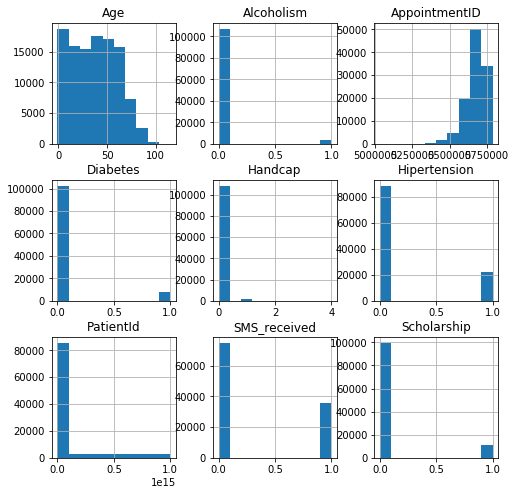

In [12]:
df.hist(figsize=[8,8]);

A basic histogram to get a general overview of the dataset.

<a id='wrangling'></a>
## Data Wrangling




### General Properties


In [13]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.


In [14]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

- I will be dropping PatientID, AppointmentID, ScheduledDay, AppointmentDay, Neighbourhood columns from the dataset.
  As according to the histograms and common sense these parameters dont seem to be significant in the, 
  Showing up to a appointment possibility.

In [15]:
df.Alcoholism.value_counts()

0    107167
1      3360
Name: Alcoholism, dtype: int64

In [16]:
df.Hipertension.value_counts()

0    88726
1    21801
Name: Hipertension, dtype: int64

In [17]:
df.Diabetes.value_counts()

0    102584
1      7943
Name: Diabetes, dtype: int64

In [18]:
df.Handcap.value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

Looks like the number of people having level 2,3,4 degree Handicap is considerably low, In this case even though we can deduce some points out of the limited number of people , it would not be valid for more than 99% of the population making it insignificant and up for being dropped.

In [19]:
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

In [20]:
df['Gender'].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64


### Data Cleaning
.
 

In [21]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [22]:
df.drop(['PatientId','ScheduledDay','AppointmentDay','Neighbourhood','AppointmentID'],axis=1,inplace=True)

In [23]:
df.head()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,0,1,0,0,0,0,No
1,M,56,0,0,0,0,0,0,No
2,F,62,0,0,0,0,0,0,No
3,F,8,0,0,0,0,0,0,No
4,F,56,0,1,1,0,0,0,No


There are no missing values, and duplicate values dont matter for this dataset as none of the factors mind having duplicates.
It just 0s or 1s for all the disorders, Scholarships and Age can be repetitive.
So no further cleaning is required, other than maybe transforming the No-show column to int type so that its easier to get statistical results. 

In [24]:
# Converting the No-show column to 1s and 0s for easier statistical result extraction.
df['No-show']=df['No-show'].replace(to_replace=['Yes','No'],value=['1','0'])


In [25]:
df['No-show'].astype(int)

0         0
1         0
2         0
3         0
4         0
         ..
110522    0
110523    0
110524    0
110525    0
110526    0
Name: No-show, Length: 110527, dtype: int64

In [26]:
df['No-show'].value_counts()

0    88208
1    22319
Name: No-show, dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis




### Research Question 1 (What was the percentage of Male vs Female patients that showed up?)

In [27]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df.groupby('Gender').head()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,0,1,0,0,0,0,0
1,M,56,0,0,0,0,0,0,0
2,F,62,0,0,0,0,0,0,0
3,F,8,0,0,0,0,0,0,0
4,F,56,0,1,1,0,0,0,0
5,F,76,0,1,0,0,0,0,0
11,M,29,0,0,0,0,0,1,1
13,M,28,0,0,0,0,0,0,0
16,M,50,0,0,0,0,0,0,0
22,M,13,0,0,0,0,0,1,1


In [28]:
#genderwise-division of dataset
genders=['F','M']
gender_props=[]
for i in genders:
    y_props=df[(df['Gender']==i) & (df['No-show']=='1')].count()['Gender']/df[df['Gender']==i].count()['Gender']
    gender_props.append(y_props)
gender_props

[0.20314587973273943, 0.19967947889471915]

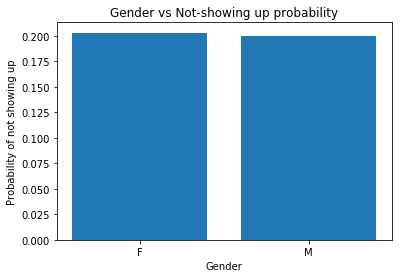

In [29]:
#Plot for comparing gender by their not-showing up probabilities
plt.bar([1, 2], gender_props, tick_label=genders)
plt.title('Gender vs Not-showing up probability')
plt.xlabel('Gender')
plt.ylabel('Probability of not showing up');

We can observe that there is a very slight difference between the missing of the appointment probability for Male vs Female. Making it clear that we cannot use just Gender as a factor for any conclusion

### Research Question 2 (Is Age related to the patient showing up at the appointment.)

In [30]:
#defining age-group boundaries
bin_edges=[0,18,37,55,115]
bin_names=['Teenager','Pre-adult','Adult','Aged']
df['Age_Group']=pd.cut(df['Age'],bin_edges,labels=bin_names)


In [31]:
df.head()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Age_Group
0,F,62,0,1,0,0,0,0,0,Aged
1,M,56,0,0,0,0,0,0,0,Aged
2,F,62,0,0,0,0,0,0,0,Aged
3,F,8,0,0,0,0,0,0,0,Teenager
4,F,56,0,1,1,0,0,0,0,Aged


In [47]:
#getting proportions of people from each age group showing up
def dataset_divider(bin_name):
    props=[]
    for i in bin_names:
        x_props=df[(df['Age_Group']==i) & (df['No-show']=='1')].count()['Gender']/df[df['Age_Group']==i].count()['Gender']
        props.append(x_props)
    print(props)
    return props
dataset_divider(bin_names)

[0.2253721325068109, 0.23537614678899083, 0.1953095963725563, 0.1564499709133217]


[0.2253721325068109,
 0.23537614678899083,
 0.1953095963725563,
 0.1564499709133217]

[0.2253721325068109, 0.23537614678899083, 0.1953095963725563, 0.1564499709133217]


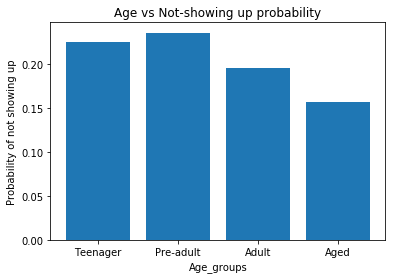

In [48]:
#Plot for comparing age-groups by their not-showing up probabilities
props=dataset_divider(bin_names)
plt.bar([1, 2, 3, 4], props, tick_label=bin_names)
plt.title('Age vs Not-showing up probability')
plt.xlabel('Age_groups')
plt.ylabel('Probability of not showing up');

As we can see that Teenager and Pre-adult age groups have the highest abscence probability among the other age groups

In [49]:
#Lets compare the difference between the proportions of aged females vs age males not showing up
age_prop=[]
for i in genders:
    aged=df[(df['Age_Group']=='Aged') & (df['No-show']=='1') & (df['Gender']==i) ].count()['Gender']/df[(df['Age_Group']=='Aged') & (df['Gender']==i) ].count()['Gender']
    age_prop.append(aged)
age_prop

[0.1605151139608815, 0.1480156512017887]

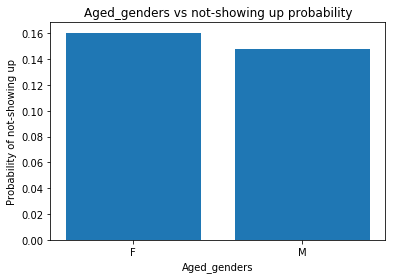

In [50]:
#Plot for Aged people vs them not showing up genderwise distribution
plt.bar([1, 2], age_prop, tick_label=genders)
plt.title('Aged_genders vs not-showing up probability')
plt.xlabel('Aged_genders')
plt.ylabel('Probability of not-showing up');

We can deduce that Aged Female members of the population have a higher probability of not showing up at the appointments.

### Research Question 3  (Was receiving a reminder SMS a factor for the patients showing up.)

In [35]:
df.head()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Age_Group
0,F,62,0,1,0,0,0,0,0,Aged
1,M,56,0,0,0,0,0,0,0,Aged
2,F,62,0,0,0,0,0,0,0,Aged
3,F,8,0,0,0,0,0,0,0,Teenager
4,F,56,0,1,1,0,0,0,0,Aged


In [36]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
sms_labels=['Smsreceived+showup','Smsreceived+notshowup','Smsnotreceived+showup','Smsnotreceived+notshowup']
sms_props=[]
sms_sent_props=df[(df['SMS_received']==1) & (df['No-show']=='0')].count()['Gender']/df.shape[0]
sms_props.append(sms_sent_props)
sms_sent_notshowprops=df[(df['SMS_received']==1) & (df['No-show']=='1')].count()['Gender']/df.shape[0]
sms_props.append(sms_sent_notshowprops)
sms_notsent_props=df[(df['SMS_received']==0) & (df['No-show']=='0')].count()['Gender']/df.shape[0]
sms_props.append(sms_notsent_props)
sms_notsent_notshowprops=df[(df['SMS_received']==0) & (df['No-show']=='1')].count()['Gender']/df.shape[0]
sms_props.append(sms_notsent_notshowprops)
sms_props

[0.23250427497353587,
 0.08852135677255331,
 0.565563165561356,
 0.11341120269255477]

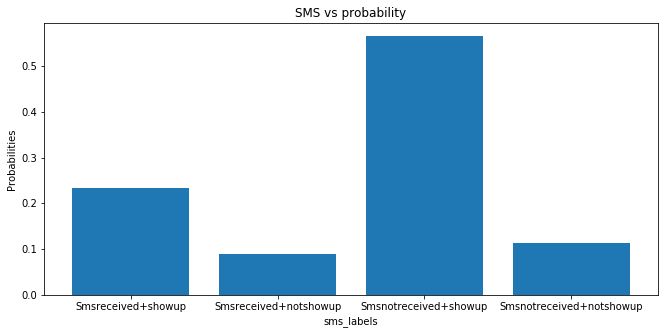

In [37]:
#Plot for demonstrating the effect of SMS recevial on the showing up probability
plt.figure(figsize=(11,5))
plt.bar([1, 2, 3, 4], sms_props, tick_label=sms_labels)
plt.title('SMS vs probability')
plt.xlabel('sms_labels')
plt.ylabel('Probabilities');

We can observe that even without receiving the SMS majority of the people still showup, leading to the conclusion that maybe SMS is not so much of a factor for showing up.

### Research Question 4  Is Any of the disorders combined were a deciding factor was the patients successful visitation?

In [38]:
df.head()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Age_Group
0,F,62,0,1,0,0,0,0,0,Aged
1,M,56,0,0,0,0,0,0,0,Aged
2,F,62,0,0,0,0,0,0,0,Aged
3,F,8,0,0,0,0,0,0,0,Teenager
4,F,56,0,1,1,0,0,0,0,Aged


In [39]:
#considering Handicap level 1 as other Handicap levels have considerably lower number of people in it
Disorders=['Hipertension','Diabetes','Alcoholism','Handcap']
disorder_props=[]
for i in Disorders:
    dis_props=df[(df[i]==1) & (df['No-show']=='1')].count()['Gender']/df[df[i]==1].count()['Gender']
    disorder_props.append(dis_props)
disorder_props

[0.17301958625751113,
 0.18003273322422259,
 0.20148809523809524,
 0.1792360430950049]

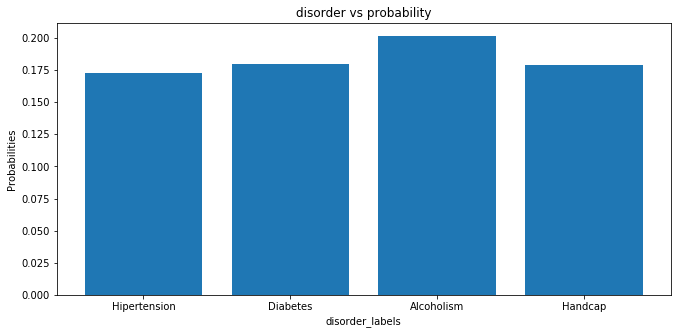

In [40]:
#Plot for visualising the disorders effect on showing up probability
plt.figure(figsize=(11,5))
plt.bar([1, 2, 3, 4], disorder_props, tick_label=Disorders)
plt.title('disorder vs probability')
plt.xlabel('disorder_labels')
plt.ylabel('Probabilities');

It appears that most of the people who suffer from Alcoholism has a slightly higher chance of not showing up for the appointments.

<a id='conclusions'></a>
## Conclusions
#### The following partial conclusions can be put forth from the research done above:

- There was a minor difference between the not showing up proportions of Male vs Female. So, only gender is not a valid parameter for making any conclusions about the dataset.
- The not-showing up rate for the teenagers(0-18) and the pre-adult(18-37) ages was the highest among the age-groups. A little idea from this result we got was that the higher the age more the probability of showing up on any given appointment.
- Upon further research into the Aged age-group (55,115) an observation that the females of the aged group had a slightly higher probability of not showing up than their male counterparts.
- SMS received was one of the parameters where we found some clear differences. We observed that SMS not received and still showing up was pretty high probability leading to the conclusion that receiving or not receiving an SMS was not so much of a factor for not showing up.
- After comparing the not-showing up probabilities of all the disorders ,it can be concluded that Alcoholism lead to the most missed appointments compared to other disorders.

#### Limitations
- We didnt consider the different levels of Handicap because of smaller dataset size for them. It could be affecting the overall dataset.
- We didnt consider the scheduledday and appointmentDay columns , but it could be a possibility that majority of the patients might not have showed up on a certain day , because of some natural disaster that might have taken place. 



## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [41]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0